<a href="https://colab.research.google.com/github/cyber-noob/My-ML-Projects/blob/master/wine_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
%%time
wine = pd.read_csv('/content/drive/My Drive/kaggle/wine_shop/Knight ML Assignment/Data/train.csv')

CPU times: user 582 ms, sys: 15 ms, total: 597 ms
Wall time: 671 ms


In [0]:
wine.isna().mean()*100

user_name             23.462018
country                0.042344
review_title           0.000000
review_description     0.000000
designation           28.608587
points                 0.000000
price                  6.737481
province               0.042344
region_1              15.430030
region_2              56.508221
winery                 0.000000
variety                0.000000
dtype: float64

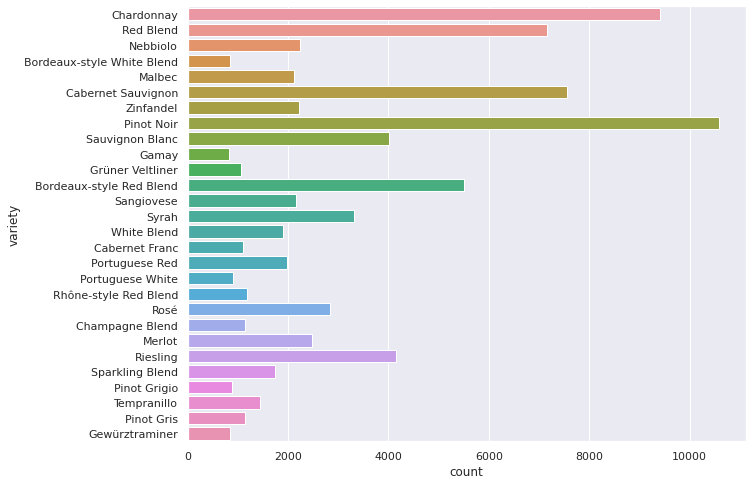

In [0]:
plt.figure(figsize = (10,8))
sns.countplot(y = wine['variety'])

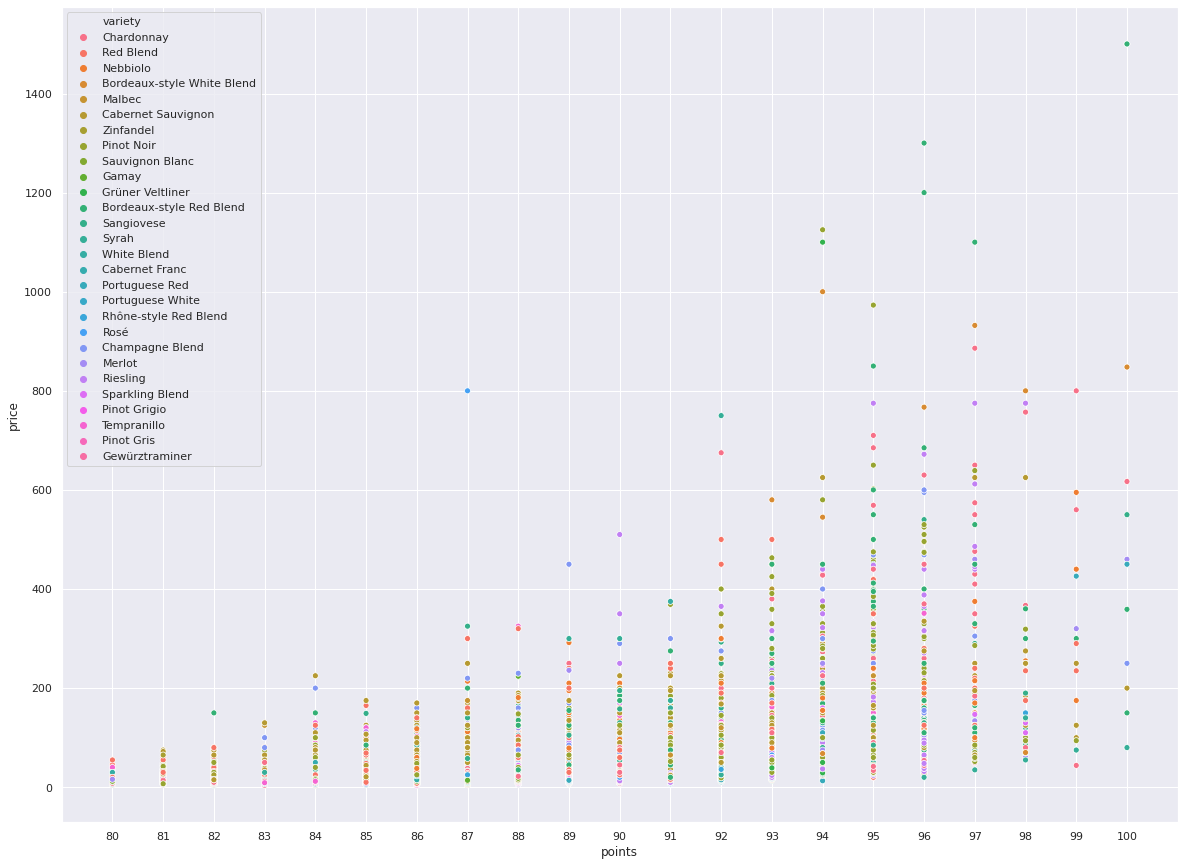

In [0]:
plt.figure(figsize=(20,15))
sns.scatterplot(wine.points,wine[wine.price <= 1500]['price'], hue = wine.variety)
plt.xticks(np.unique(wine.points))
plt.show()

We can cearly see that points play a major role in deciding the price of the wine or it can be other way around too. Psychologically people tend to give high ratings/scores for expensive items eventhough if its cheap counterpart tastes the same for no reason at all. As the points given by the user increases there is a high fluctuation in the prices ultimately leading to very large outliers (i.e., ultimately selling at a very expensive price compared to its original value).

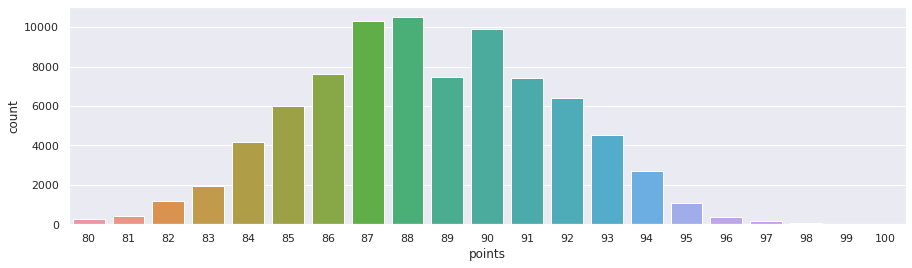

In [0]:
plt.figure(figsize = (15,4))
sns.set(font_scale = 1)
sns.countplot(wine['points'])
plt.show()

We can sa that the points given to wine bottles are having a "Normal Distribution" indicting that there are no discrimination in judging the wine among the test users and most of them has given a reasonable score of 87-90 not too less and not too much.

In [0]:
!pip install geopandas

In [0]:
import geopandas as gpd

In [0]:
df = gpd.read_file('/content/drive/My Drive/earth/ne_110m_admin_0_countries.shp')
df.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,...,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,920938,11,8374.0,2017,2007,...,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,Fidji,Φίτζι,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,53950935,16,150600.0,2017,2002,...,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,Tanzanie,Τανζανία,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,Self admin.,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253,11,906.5,2017,-99,...,MAR,SAH,-99,-99,Africa,Africa,Northern Africa,Middle East & North Africa,9,14,7,-99,1,4.7,6.0,11.0,1159321223,Q6250,الصحراء الغربية,পশ্চিম সাহারা,Westsahara,Western Sahara,Sahara Occidental,Sahara occidental,Δυτική Σαχάρα,पश्चिमी सहारा,Nyugat-Szahara,Sahara Barat,Sahara Occidentale,西サハラ,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,0,Canada,CAN,0,Canada,CAN,0,Canada,Canada,CAN,Canada,None,Can.,CA,Canada,None,Canada,None,None,Canada,None,6,6,2,2,35623680,15,1674000.0,2017,2011,...,CAN,CAN,-99,-99,North America,Americas,Northern America,North America,6,6,4,-99,1,0.0,1.7,5.7,1159320467,Q16,كندا,কানাডা,Kanada,Canada,Canadá,Canada,Καναδάς,कनाडा,Kanada,Kanada,Canada,カナダ,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,0,United States of America,USA,0,United States,USA,0,United States of America,United States,USA,United States,None,U.S.A.,US,United States of America,None,United States,None,None,United States of America,None,4,5,1,1,326625791,17,18560000.0,2017,2010,...,USA,USA,-99,-99,North America,Americas,Northern America,North America,24,13,6,-99,1,0.0,1.7,5.7,1159321369,Q30,الولايات المتحدة,মার্কিন যুক্তরাষ্ট্র,Vereinigte Staaten,United States of America,Estados Unidos,États-Unis,Ηνωμένες Πολιτείες Αμερικής,संयुक्त राज्य अमेरिका,Amerikai Egyesült Államok,Amerika Serikat,Stati Uniti d'America,アメリカ合衆国,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [0]:
df.index

RangeIndex(start=0, stop=177, step=1)

In [0]:
df['SOVEREIGNT'].replace({'United States of America': 'US'}, inplace = True)    #wine contains country name as 'US' and our geographical polygons
                                                                                #dataset contains country name as 'United States of America'

In [0]:
df = df[['SOVEREIGNT', 'geometry']]

In [0]:
df.rename(columns = {'SOVEREIGNT':'country'}, inplace = True)

In [0]:
merged = pd.merge(df, wine, on = 'country', how = 'outer')

In [0]:
!pip install mapclassify

In [0]:
merged = merged[['country', 'geometry', 'price']]

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 34
  Warn("Warning: setting k to %d" % k_q, UserWarning)


CPU times: user 2min 11s, sys: 575 ms, total: 2min 12s
Wall time: 2min 12s


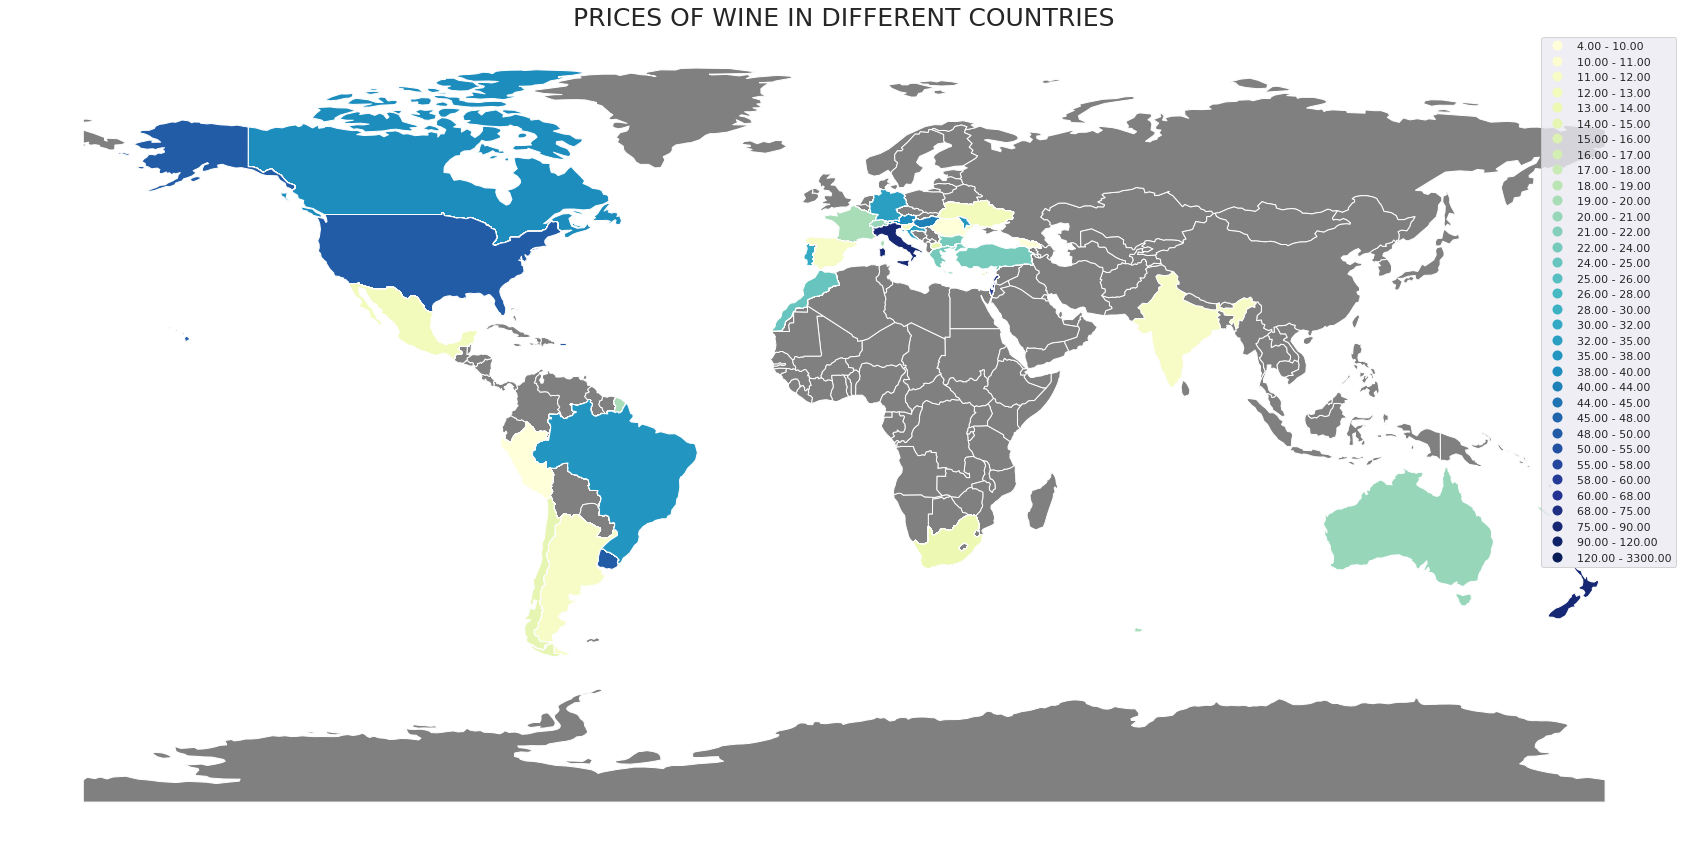

In [0]:
%%time
%matplotlib inline
ax = df.plot(color = 'grey', figsize = (30,15))
merged.plot(ax = ax, column = 'price', cmap = 'YlGnBu', figsize=(30,15), scheme='quantiles',  
                  k=40, legend = True);
ax.set_axis_off()
ax.set_title('PRICES OF WINE IN DIFFERENT COUNTRIES', fontdict= {'fontsize':25})

Seems like wine are really cheap in India and other hot countries. Similarly cold countries such as Canada and USA seem to have expensive wines. This may be due to the fact that lands to cultivate are really expensive in these countries compared to others in our list and if heavy government taxes are added to our forementioned point, it is no surprise that wine in these countries are expensive. [Note: Grey portions in the map indicate that no data is available for that country in the dataset we use]

Now lets find out which is the most expensive wine we have in our list.

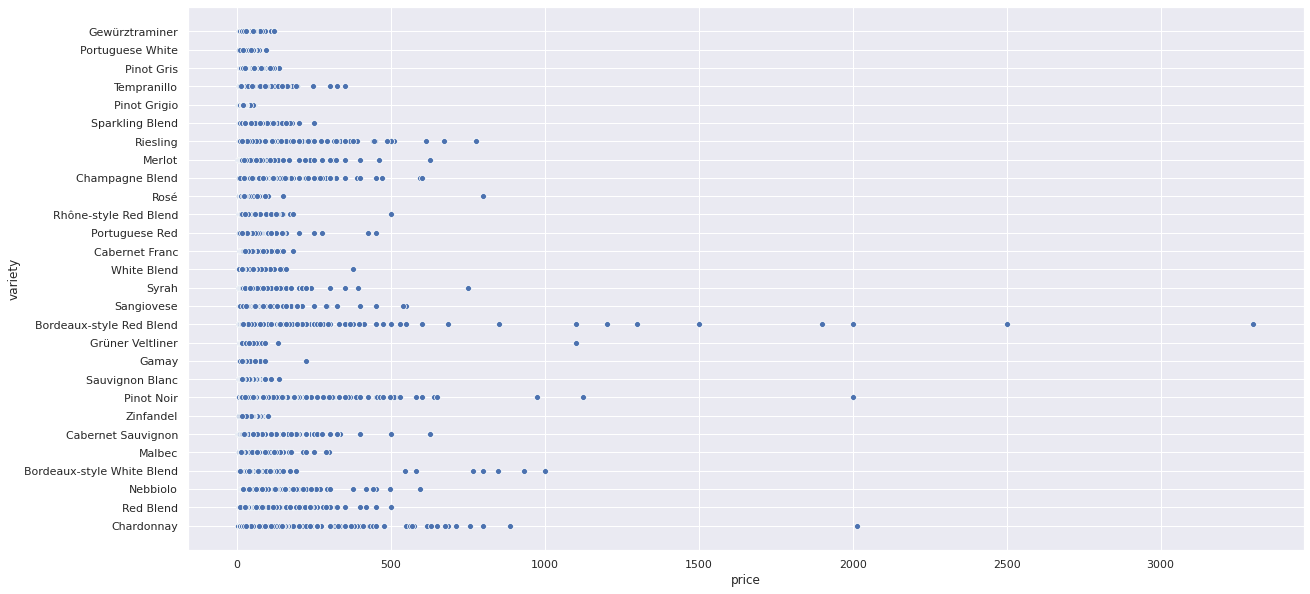

In [0]:
plt.figure(figsize = (20,10))
sns.scatterplot(wine['price'], wine['variety'])

And the winner is Bordeaux-style Red Blend wine with the highest outliers compared to the ones in our dataset.(Most expensive one)

In [0]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
points,82657.0,88.544564,3.099649,80.0,86.0,88.0,91.0,100.0
price,77088.0,36.922232,43.698346,4.0,18.0,27.0,45.0,3300.0


In [0]:
temp = []
for i in range(101): 
  temp.append([i,np.nanpercentile(wine['price'],i)]) 
temp = pd.DataFrame(temp, columns = ['percentile','price'])
temp.head()

In [0]:
temp = temp.merge(wine, on = 'price', how = 'outer')

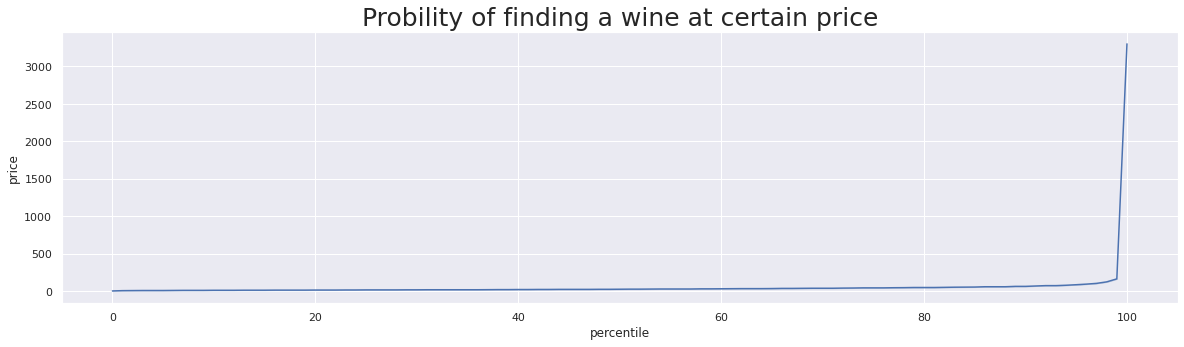

In [0]:
plt.figure(figsize = (20,5))
sns.lineplot(temp['percentile'], temp['price'])
plt.title('Probility of finding a wine at certain price', fontdict={'fontsize':25})
plt.show()

In [0]:
print('99th percentile : ', np.nanpercentile(wine['price'],99))
print('Max price :', max(wine['price']))

99th percentile :  165.0
Max price : 3300.0


This shows that there is 99% probability that one can fine a wine bottle for a price on or below 165 and the rest of the data suggests a strong outlier that extends upto 3300 (Really unlucky ones to find a wine at that price). This findings can be attributed to the fact that each country has its own pricing for the same wine (geographical location dependent).

#Now lets analyse some customer reviews

In [0]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

In [0]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in wine['review_description']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

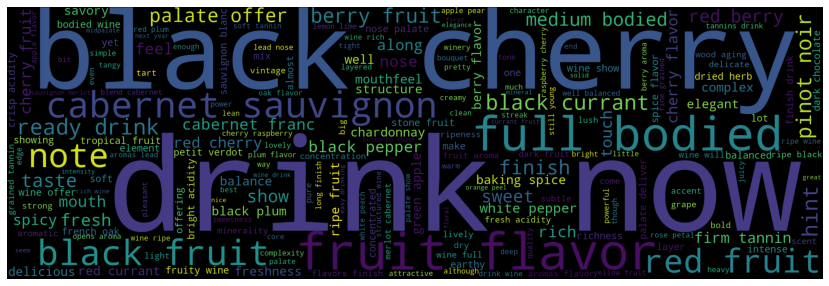

In [0]:
wordcloud = WordCloud(width = 2400, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (30,5)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

Our first look into the wordcloud shows that most of the reviews concentrate on flavours and texture of the drink showing an overall positive view on all the wine varities reviewed.